In [1]:
# This file generates the data for Figure #4 from the paper https://arxiv.org/pdf/1806.06975.pdf

import os 
import pickle
import argparse
import networkx as nx

import pandas as pd
import numpy as np

import itertools
import sklearn
import torch
import datetime
import matplotlib, matplotlib.pyplot as plt

from torch.autograd import Variable

from models.model_wrapper import WrappedModel
from data import datasets
from data.graph_wrapper import GeneManiaGraph, RegNetGraph
from data.utils import record_result

In [2]:
dataset = datasets.TCGADataset()
dataset.df = dataset.df - dataset.df.mean(axis=0)
label_df = dataset.df.where(dataset.df > 0).notnull().astype("int")


Checking for pieces on disk: |----------------------------------------------------------------------------------------------------| 0.0%  finished

Checking for pieces on disk: |███-------------------------------------------------------------------------------------------------| 3.0%  finished

Checking for pieces on disk: |██████----------------------------------------------------------------------------------------------| 6.0%  finished

Checking for pieces on disk: |█████████-------------------------------------------------------------------------------------------| 9.0%  finished

Checking for pieces on disk: |████████████----------------------------------------------------------------------------------------| 12.0%  finished

Checking for pieces on disk: |███████████████-------------------------------------------------------------------------------------| 15.0%  finished

Checking for pieces on disk: |██████████████████----------------------------------------------------------------------------------| 18.0%  finished

Checking for pieces on disk: |█████████████████████-------------------------------------------------------------------------------| 21.0%  finished

Checking for pieces on disk: |████████████████████████----------------------------------------------------------------------------| 24.0%  finished

Checking for pieces on disk: |███████████████████████████-------------------------------------------------------------------------| 27.0%  finished

Checking for pieces on disk: |██████████████████████████████----------------------------------------------------------------------| 30.0%  finished

Checking for pieces on disk: |█████████████████████████████████-------------------------------------------------------------------| 33.0%  finished

Checking for pieces on disk: |████████████████████████████████████----------------------------------------------------------------| 36.0%  finished

Checking for pieces on disk: |███████████████████████████████████████-------------------------------------------------------------| 39.0%  finished

Checking for pieces on disk: |██████████████████████████████████████████----------------------------------------------------------| 42.0%  finished

Checking for pieces on disk: |█████████████████████████████████████████████-------------------------------------------------------| 45.0%  finished

Checking for pieces on disk: |████████████████████████████████████████████████----------------------------------------------------| 48.0%  finished

Checking for pieces on disk: |███████████████████████████████████████████████████-------------------------------------------------| 51.0%  finished

Checking for pieces on disk: |██████████████████████████████████████████████████████----------------------------------------------| 54.0%  finished

Checking for pieces on disk: |█████████████████████████████████████████████████████████-------------------------------------------| 57.0%  finished

Checking for pieces on disk: |████████████████████████████████████████████████████████████----------------------------------------| 60.0%  finished

Checking for pieces on disk: |███████████████████████████████████████████████████████████████-------------------------------------| 63.0%  finished

Checking for pieces on disk: |██████████████████████████████████████████████████████████████████----------------------------------| 66.0%  finished

Checking for pieces on disk: |█████████████████████████████████████████████████████████████████████-------------------------------| 69.0%  finished

Checking for pieces on disk: |████████████████████████████████████████████████████████████████████████----------------------------| 72.0%  finished

Checking for pieces on disk: |███████████████████████████████████████████████████████████████████████████-------------------------| 75.0%  finished

Checking for pieces on disk: |██████████████████████████████████████████████████████████████████████████████----------------------| 78.0%  finished

Checking for pieces on disk: |█████████████████████████████████████████████████████████████████████████████████-------------------| 81.0%  finished

Checking for pieces on disk: |████████████████████████████████████████████████████████████████████████████████████----------------| 84.0%  finished

Checking for pieces on disk: |███████████████████████████████████████████████████████████████████████████████████████-------------| 87.0%  finished

Checking for pieces on disk: |██████████████████████████████████████████████████████████████████████████████████████████----------| 90.0%  finished

Checking for pieces on disk: |█████████████████████████████████████████████████████████████████████████████████████████████-------| 93.0%  finished

Checking for pieces on disk: |████████████████████████████████████████████████████████████████████████████████████████████████----| 96.0%  finished

Checking for pieces on disk: |███████████████████████████████████████████████████████████████████████████████████████████████████-| 99.0%  finished

Checking for pieces on disk: |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0%  finished


Found 1668 finished pieces out of 1668 total pieces.


Converting one-hot labels to integers


In [3]:
graphs = {"regnet": RegNetGraph(), "genemania": GeneManiaGraph()}


Checking for pieces on disk: |----------------------------------------------------------------------------------------------------| 0.0%  finished

Checking for pieces on disk: |███-------------------------------------------------------------------------------------------------| 3.1%  finished

Checking for pieces on disk: |██████----------------------------------------------------------------------------------------------| 6.3%  finished

Checking for pieces on disk: |█████████-------------------------------------------------------------------------------------------| 9.4%  finished

Checking for pieces on disk: |█████████████---------------------------------------------------------------------------------------| 12.5%  finished

Checking for pieces on disk: |████████████████------------------------------------------------------------------------------------| 15.7%  finished

Checking for pieces on disk: |███████████████████---------------------------------------------------------------------------------| 18.8%  finished

Checking for pieces on disk: |██████████████████████------------------------------------------------------------------------------| 22.0%  finished

Checking for pieces on disk: |█████████████████████████---------------------------------------------------------------------------| 25.1%  finished

Checking for pieces on disk: |████████████████████████████------------------------------------------------------------------------| 28.2%  finished

Checking for pieces on disk: |███████████████████████████████---------------------------------------------------------------------| 31.4%  finished

Checking for pieces on disk: |███████████████████████████████████-----------------------------------------------------------------| 34.5%  finished

Checking for pieces on disk: |██████████████████████████████████████--------------------------------------------------------------| 37.6%  finished

Checking for pieces on disk: |█████████████████████████████████████████-----------------------------------------------------------| 40.8%  finished

Checking for pieces on disk: |████████████████████████████████████████████--------------------------------------------------------| 43.9%  finished

Checking for pieces on disk: |███████████████████████████████████████████████-----------------------------------------------------| 47.1%  finished

Checking for pieces on disk: |██████████████████████████████████████████████████--------------------------------------------------| 50.2%  finished

Checking for pieces on disk: |█████████████████████████████████████████████████████-----------------------------------------------| 53.3%  finished

Checking for pieces on disk: |████████████████████████████████████████████████████████--------------------------------------------| 56.5%  finished

Checking for pieces on disk: |████████████████████████████████████████████████████████████----------------------------------------| 59.6%  finished

Checking for pieces on disk: |███████████████████████████████████████████████████████████████-------------------------------------| 62.7%  finished

Checking for pieces on disk: |██████████████████████████████████████████████████████████████████----------------------------------| 65.9%  finished

Checking for pieces on disk: |█████████████████████████████████████████████████████████████████████-------------------------------| 69.0%  finished

Checking for pieces on disk: |████████████████████████████████████████████████████████████████████████----------------------------| 72.1%  finished

Checking for pieces on disk: |███████████████████████████████████████████████████████████████████████████-------------------------| 75.3%  finished

Checking for pieces on disk: |██████████████████████████████████████████████████████████████████████████████----------------------| 78.4%  finished

Checking for pieces on disk: |██████████████████████████████████████████████████████████████████████████████████------------------| 81.6%  finished

Checking for pieces on disk: |█████████████████████████████████████████████████████████████████████████████████████---------------| 84.7%  finished

Checking for pieces on disk: |████████████████████████████████████████████████████████████████████████████████████████------------| 87.8%  finished

Checking for pieces on disk: |███████████████████████████████████████████████████████████████████████████████████████████---------| 91.0%  finished

Checking for pieces on disk: |██████████████████████████████████████████████████████████████████████████████████████████████------| 94.1%  finished

Checking for pieces on disk: |█████████████████████████████████████████████████████████████████████████████████████████████████---| 97.2%  finished

Checking for pieces on disk: |████████████████████████████████████████████████████████████████████████████████████████████████████| 100.0%  finished


Found 1595 finished pieces out of 1595 total pieces.


In [4]:
# Setup the results dictionary
filename = "experiments/results/fig-4.pkl"
try:
    results = pickle.load(open(filename, "r"))
    print("Loaded Checkpointed Results")
except Exception as e:
    results = pd.DataFrame(columns=['auc', 'gene', 'model', 'graph', 'is_first_degree', 'seed', 'train_size'])
    print("Created a New Results Dictionary")


Created a New Results Dictionary


In [6]:
train_size = 50
test_size = 1000
trials = 3
cuda = False
models = [WrappedModel(name="MLP", column_names=dataset.df.columns, dropout=False, cuda=cuda)]


In [8]:
# Create the set of all experiment ids and see which are left to do
model_names = [model.name for model in models]
columns = ["gene", "graph", "model", "seed", "is_first_degree", "train_size"]
all_exp_ids = [x for x in itertools.product(dataset.df.columns, graphs.keys(), model_names, range(trials),
                                            [True, False], [train_size])]
all_exp_ids = pd.DataFrame(all_exp_ids, columns=columns)
all_exp_ids.index = ["-".join(map(str, tup[1:])) for tup in all_exp_ids.itertuples(name=None)]
results_exp_ids = results[columns].copy()
results_exp_ids.index = ["-".join(map(str, tup[1:])) for tup in results_exp_ids.itertuples(name=None)]
intersection_ids = all_exp_ids.index.intersection(results_exp_ids.index)
todo = all_exp_ids.drop(intersection_ids).to_dict(orient="records")

print("todo: " + str(len(todo)))
print("done: " + str(len(results)))

todo: 195600
done: 0


In [11]:
for row in todo:
    if len(results) % 10 == 0:
        print(len(results))
    gene = row["gene"]
    graph_name = row["graph"]
    model_name = row["model"]
    seed = row["seed"]
    is_first_degree = row["is_first_degree"]
    model = [x for x in models if x.name == model_name][0]

    experiment = {
        "gene": gene,
        "model": model.name,
        "graph": graph_name,
        "is_first_degree": is_first_degree,
        "seed": seed,
        "train_size": train_size,
    }

    dataset.labels = label_df[gene]
    try:
        X_train, X_test, y_train, y_test = sklearn.model_selection.\
            train_test_split(dataset.df, dataset.labels, stratify=dataset.labels, 
                             train_size=train_size, test_size=test_size)
    except ValueError:
        results = record_result(results, experiment, filename)
        continue
    if is_first_degree:
        gene_graph = graphs[graph_name]
        neighbors = list(gene_graph.first_degree(gene)[0])
        X_train = X_train.loc[:, neighbors].copy()
        X_test = X_test.loc[:, neighbors].copy()
    else:
        X_train = X_train.copy()
        X_test = X_test.copy()
    X_train[gene] = 1
    X_test[gene] = 1

    try:
        model.fit(X_train, y_train)
        x_test = Variable(torch.FloatTensor(np.expand_dims(X_test.values, axis=2)), requires_grad=False)\
            .float()
        if cuda:
            x_test = x_test.cuda()
        y_hat = model.predict(x_test)[:, 1].data.cpu().numpy()
        auc = sklearn.metrics.roc_auc_score(y_test, np.asarray(y_hat).flatten())
        model.best_model = None # cleanup
        experiment["auc"] = auc
    except Exception as e:
        print(e)
    results = record_result(results, experiment, filename)


0
could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'


/home/user1/miniconda3/envs/genegraph/lib/python3.7/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
/home/user1/miniconda3/envs/genegraph/lib/python3.7/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'


/home/user1/miniconda3/envs/genegraph/lib/python3.7/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'


could not determine the shape of object type 'Series'
10
could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'


could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'


could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'
20
could not determine the shape of object type 'Series'


could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'


could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'


could not determine the shape of object type 'Series'
30
could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'


could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'


could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'
40
could not determine the shape of object type 'Series'


could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'


could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'


/home/user1/miniconda3/envs/genegraph/lib/python3.7/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
/home/user1/miniconda3/envs/genegraph/lib/python3.7/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


could not determine the shape of object type 'Series'
50
could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'


/home/user1/miniconda3/envs/genegraph/lib/python3.7/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'


could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'
60
could not determine the shape of object type 'Series'


/home/user1/miniconda3/envs/genegraph/lib/python3.7/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
/home/user1/miniconda3/envs/genegraph/lib/python3.7/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'


/home/user1/miniconda3/envs/genegraph/lib/python3.7/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'


could not determine the shape of object type 'Series'
70
could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'


could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'


could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'
80
could not determine the shape of object type 'Series'


could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'


could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'


could not determine the shape of object type 'Series'
90
could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'


could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'


could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'
100
could not determine the shape of object type 'Series'


could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'


could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'


could not determine the shape of object type 'Series'
110
could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'


could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'
could not determine the shape of object type 'Series'


KeyboardInterrupt: 

In [10]:
# Compare the performance of each graph at predicting their neighbors
df = results

first_degree = df[df['is_first_degree'] == True][df['graph'] == 'genemania'].groupby(['gene', 'model', 'train_size'])['auc'].agg(['mean', 'std'])
full = df[df['is_first_degree'] == False][df['graph'] == 'genemania'].groupby(['gene','model', 'train_size'])['auc'].agg(['mean', 'std'])
genemania_df = first_degree.sub(full).sort_values('mean', ascending=False)

first_degree = df[df['is_first_degree'] == True][df['graph'] == 'regnet'].groupby(['gene', 'model', 'train_size'])['auc'].agg(['mean', 'std'])
full = df[df['is_first_degree'] == False][df['graph'] == 'regnet'].groupby(['gene','model', 'train_size'])['auc'].agg(['mean', 'std'])
regnet_df = first_degree.sub(full).sort_values('mean', ascending=False)


DataError: No numeric types to aggregate

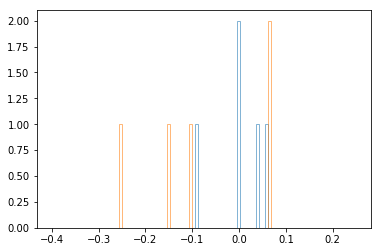

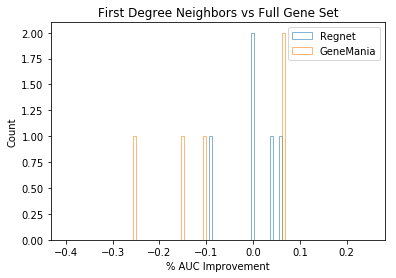

In [15]:

l1 = genemania_df['mean']
l2 = regnet_df['mean']

fig, ax = plt.subplots()
n1, bins1, patches1 = ax.hist(l1, range=(-.4, .25), bins=100, label="Regnet", density=0, alpha=0.55, histtype='step')
n1, bins1, patches1 = ax.hist(l2, range=(-.4, .25), bins=100, label="GeneMania", density=0, alpha=0.55, histtype='step')


fig, ax = plt.subplots()
n1, bins1, patches1 = ax.hist(l1, range=(-.4, .25), bins=100, label="Regnet", density=0, alpha=0.55, histtype='step')
n1, bins1, patches1 = ax.hist(l2, range=(-.4, .25), bins=100, label="GeneMania", density=0, alpha=0.55, histtype='step')

plt.title("First Degree Neighbors vs Full Gene Set")
plt.ylabel("Count")
plt.xlabel("% AUC Improvement")

plt.legend()
plt.show()